We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

In [171]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [172]:
# Loading the data

bank = pd.read_csv('bank_note_data.csv')

In [173]:
# Preview head

bank.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [174]:
# Preview tail

bank.tail()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


## EDA

In [175]:
# info and description of the dataset

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [176]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Image.Var,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Image.Skew,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Image.Curt,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [177]:
# Check for missing data

bank.isnull().values.any()

False

In [178]:
# No missing data points
# Check for repeated data

bank.duplicated().any()

True

In [179]:
# Preview and drop duplicates

print(bank[bank.duplicated()])
print("\n")
print("The number of rows with duplicated data is ", len(bank[bank.duplicated()]))
bank.drop_duplicates(keep='first', inplace=True)

     Image.Var  Image.Skew  Image.Curt  Entropy  Class
47     -0.7869      9.5663     -3.7867  -7.5034      0
139    -0.2062      9.2207     -3.7044  -6.8103      0
190     0.9297     -3.7971      4.6429  -0.2957      0
195    -1.8584      7.8860     -1.6643  -1.8384      0
226     0.5706     -0.0248      1.2421  -0.5621      0
268     0.9297     -3.7971      4.6429  -0.2957      0
284    -1.3000     10.2678     -2.9530  -5.8638      0
300     0.3292     -4.4552      4.5718  -0.9888      0
315     0.3292     -4.4552      4.5718  -0.9888      0
320     0.5195     -3.2633      3.0895  -0.9849      0
345    -1.8584      7.8860     -1.6643  -1.8384      0
351     0.5195     -3.2633      3.0895  -0.9849      0
352     0.3292     -4.4552      4.5718  -0.9888      0
404     0.3798      0.7098      0.7572  -0.4444      0
427    -1.3000     10.2678     -2.9530  -5.8638      0
436     0.3798      0.7098      0.7572  -0.4444      0
476     0.3798      0.7098      0.7572  -0.4444      0
498     0.

### Univariate Analysis

In [180]:
bank.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


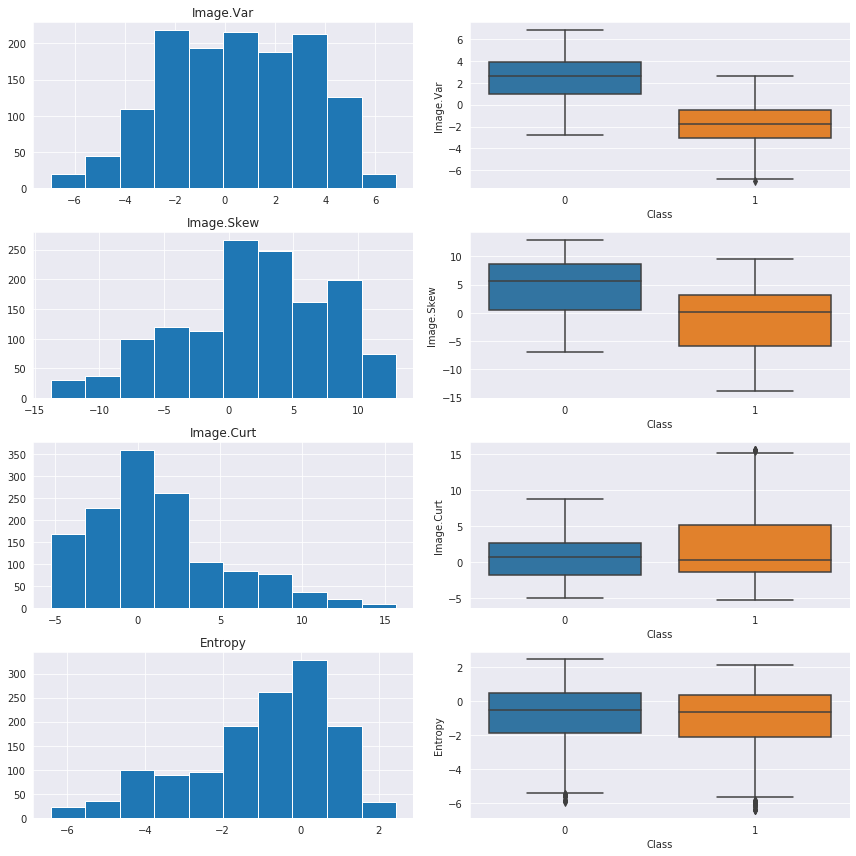

<Figure size 864x288 with 0 Axes>

In [208]:
# Plotting a histogram and boxplot for every feature column to look for outliers

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,12))
plt.figure(figsize=(12,4))

cols = bank.drop('Class', axis=1).columns

ax[0,0].hist(bank['Image.Var'])
sns.boxplot(x='Class', y='Image.Var', data=bank, ax=ax[0,1])
ax[0,0].set_title("Image.Var")

ax[1,0].hist(bank['Image.Skew'])
sns.boxplot(x='Class', y='Image.Skew', data=bank, ax=ax[1,1])
ax[1,0].set_title("Image.Skew")

ax[2,0].hist(bank['Image.Curt'])
sns.boxplot(x='Class', y='Image.Curt', data=bank, ax=ax[2,1])
ax[2,0].set_title("Image.Curt")

ax[3,0].hist(bank['Entropy'])
sns.boxplot(x='Class', y='Entropy', data=bank, ax=ax[3,1])
ax[3,0].set_title("Entropy")

fig.tight_layout()

We can see there are outliers at the lower edge of Image.Var boxplots, same to Entropy.  
And at the upper edge of Image.Curt boxplot where Class is 1.  
Let's treat those particular outliers.

In [182]:
bank0 = bank[bank['Class'] ==0]
bank1 = bank[bank['Class'] ==1]

print(bank0[bank0['Image.Var'] < -4])
print(bank1[bank1['Image.Var'] < -7])

print(bank1[bank1['Image.Curt'] > 16])

print(bank0[bank0['Entropy'] < -6])
print(bank1[bank1['Entropy'] < -6.5])

     Image.Var  Image.Skew  Image.Curt  Entropy  Class
349    -4.2859      8.5234      3.1392 -0.91639      0
      Image.Var  Image.Skew  Image.Curt  Entropy  Class
1233    -7.0421      9.2000     0.25933  -4.6832      1
1294    -7.0364      9.2931     0.16594  -4.5396      1
      Image.Var  Image.Skew  Image.Curt  Entropy  Class
820     -4.0025    -13.4979     17.6772  -3.3202      1
881     -4.4861    -13.2889     17.3087  -3.2194      1
942     -3.3793    -13.7731     17.9274  -2.0323      1
1003    -3.8203    -13.0551     16.9583  -2.3052      1
1064    -3.6961    -13.6779     17.5795  -2.6181      1
1125    -3.5985    -13.6593     17.6052  -2.4927      1
1186    -4.2440    -13.0634     17.1116  -2.8017      1
1247    -4.4775    -13.0303     17.0834  -3.0345      1
1308    -4.6338    -12.7509     16.7166  -3.2168      1
1369    -3.7503    -13.4586     17.5932  -2.7771      1
     Image.Var  Image.Skew  Image.Curt  Entropy  Class
41    -0.20620      9.2207   -3.704400  -6.8103    

In [183]:
# Treating outliers

bank0['Image.Var'][bank0['Image.Var'] < -4] = np.mean(bank0['Image.Var'])
bank1['Image.Var'][bank1['Image.Var'] < -7] = np.median(bank0['Image.Var'])

bank1['Image.Curt'][bank1['Image.Curt'] > 16] = np.mean(bank1['Image.Curt'])

bank0['Entropy'][bank0['Entropy'] < -6] = np.mean(bank0['Entropy'])
bank1['Entropy'][bank1['Entropy'] < -6.5] = np.mean(bank1['Entropy'])

In [184]:
# Refactor our dataframe

bank = pd.concat([bank0, bank1])

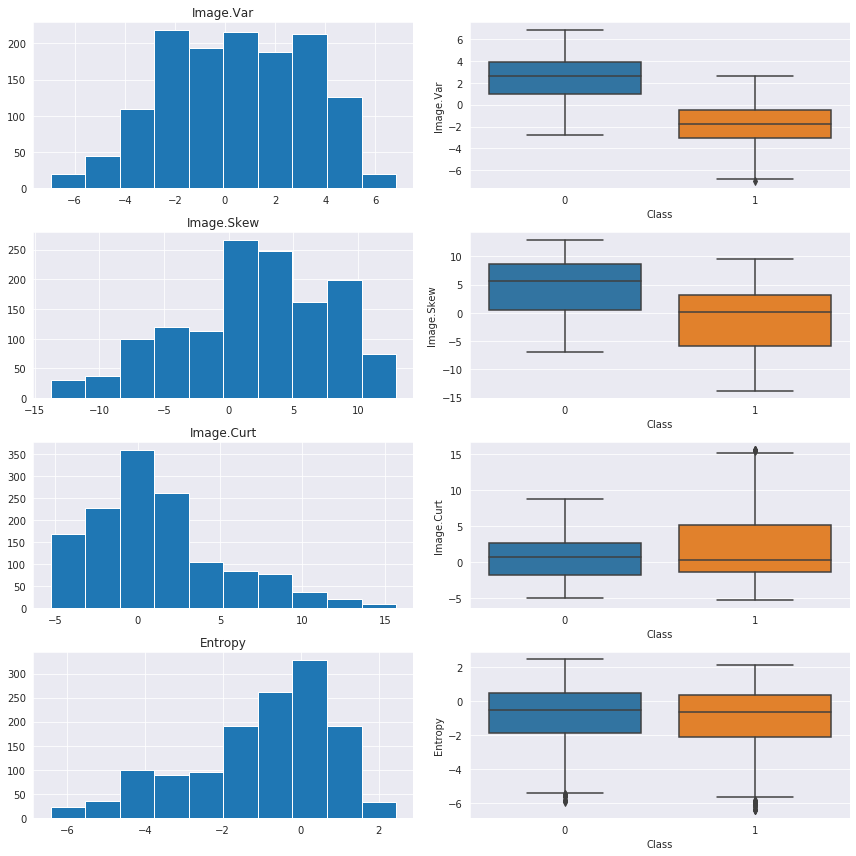

<Figure size 864x288 with 0 Axes>

In [207]:
# Replotting the figures to see that the outliers have been treated

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,12))
plt.figure(figsize=(12,4))

cols = bank.drop('Class', axis=1).columns

ax[0,0].hist(bank['Image.Var'])
sns.boxplot(x='Class', y='Image.Var', data=bank, ax=ax[0,1])
ax[0,0].set_title("Image.Var")

ax[1,0].hist(bank['Image.Skew'])
sns.boxplot(x='Class', y='Image.Skew', data=bank, ax=ax[1,1])
ax[1,0].set_title("Image.Skew")

ax[2,0].hist(bank['Image.Curt'])
sns.boxplot(x='Class', y='Image.Curt', data=bank, ax=ax[2,1])
ax[2,0].set_title("Image.Curt")

ax[3,0].hist(bank['Entropy'])
sns.boxplot(x='Class', y='Entropy', data=bank, ax=ax[3,1])
ax[3,0].set_title("Entropy")

fig.tight_layout()

In [187]:
# Note that there is some slight differenceabs

### Data preparation
Preparing data for the deep learning algorithms

In [193]:
# Scaling

scaler = StandardScaler()
X = bank.drop('Class', axis=1)

scaled_features = scaler.fit_transform(X)

In [194]:
df = pd.DataFrame(scaled_features, columns=X.columns)

In [195]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.109105,1.151820,-1.001499,0.306756
1,1.433874,1.066810,-0.916490,-0.247685
2,1.194979,-0.775147,0.151988,0.609039
3,1.051129,1.297854,-1.294997,-1.412324
4,-0.047723,-1.084859,0.797443,0.010826


In [196]:
# splitting data to train and test splits

X_train, X_test, y_train, y_test = train_test_split(X, bank['Class'], test_size=0.3)

## Tensorflow

In [199]:
# List of column features

feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))
    
print(feat_cols)

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [200]:
# Instantiate DNN classifier
##
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], feature_columns=feat_cols, n_classes=2)

# Input function for the training data
##
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,shuffle=True)

# Training the classifier
##
classifier.train(input_fn=input_func, steps=500)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpohhbrrd7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f58edff1750>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatical

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpohhbrrd7/model.ckpt.
INFO:tensorflow:loss = 10.5129795, step = 1
INFO:tensorflow:Saving checkpoints for 48 into /tmp/tmpohhbrrd7/model.ckpt.
INFO:tensorflow:Loss for final step: 0.014761609.


### Model evaluation

In [201]:
# Input function for the testing data
##
pred_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

# Predictions
##
predictions = list(classifier.predict(input_fn=pred_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpohhbrrd7/model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [206]:
predictions[0]

{'logits': array([5.022882], dtype=float32),
 'logistic': array([0.99345756], dtype=float32),
 'probabilities': array([0.00654243, 0.9934576 ], dtype=float32),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [212]:
final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])
    
print(final_preds)

[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 

In [213]:
# conf. matrix and classf. report

print(confusion_matrix(y_test, final_preds))
print("\n")
print(classification_report(y_test, final_preds))

[[217   2]
 [  0 186]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       219
           1       0.99      1.00      0.99       186

    accuracy                           1.00       405
   macro avg       0.99      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



In [214]:
# We got 100% accuracy!!
# We did great!

Since this is my first tensorflow model, I want to compare it with a scikit-learn model such as RFC.

### Optional comparison

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': np.arange(10,110,10),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2,10)
}

rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=10)

rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [219]:
print("Best score: ", rfc_grid.best_score_)
print("Best parameters: ", rfc_grid.best_params_)

Best score:  0.9936373276776246
Best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 50}


In [220]:
grid_pred = rfc_grid.predict(X_test)

In [222]:
print(confusion_matrix(y_test, grid_pred))
print("\n")
print(classification_report(y_test, grid_pred))

[[219   0]
 [  1 185]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      0.99      1.00       186

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



In [ ]:
# It seems that for this particular dataset, the results for both models are almost the same.